In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore")

In [45]:
df=pd.read_csv('movies.csv')
df['id']=df.index

In [46]:
df=df.dropna()
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,id
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,2
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,3
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,4


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
 15  id        5421 non-null   int64  
dtypes: float64(5), int64(2), object(9)
memory usage: 720.0+ KB


In [48]:
movies_df = df[["rating", "genre", "score","runtime"]]
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   5421 non-null   object 
 1   genre    5421 non-null   object 
 2   score    5421 non-null   float64
 3   runtime  5421 non-null   float64
dtypes: float64(2), object(2)
memory usage: 211.8+ KB


In [49]:
movies_df=movies_df.dropna()
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   5421 non-null   object 
 1   genre    5421 non-null   object 
 2   score    5421 non-null   float64
 3   runtime  5421 non-null   float64
dtypes: float64(2), object(2)
memory usage: 211.8+ KB


In [50]:
movies_df.genre.value_counts()

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

In [51]:
# mình sẽ group các thể loại ít xuất hiện thành một nhóm other
movies_df['genre']=movies_df['genre'].apply(lambda genre: genre if genre in ['Comedy','Action','Drama','Crime','Biography','Adventure','Animation','Horror'] else 'Others')

In [52]:
movies_df['genre'].value_counts()

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Others         82
Name: genre, dtype: int64

In [53]:
#để chuyển genre sang dạng số thì mình sẽ dùng mapper
mapper={'Comedy':0,'Action':1,'Drama':2,'Crime':3,'Biography':4,'Adventure':5,'Animation':5,'Horror':6,'Others':7}
movies_df['genre']=movies_df['genre'].map(mapper)
movies_df.head()

,rating,genre,score,runtime
0,R,2,8.4,146.0
1,R,5,5.8,104.0
2,PG,1,8.7,124.0
3,PG,0,7.7,88.0
4,R,0,7.3,98.0


In [54]:
movies_df.rating.value_counts()

R            2597
PG-13        1729
PG            907
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: rating, dtype: int64

In [55]:
# mình sẽ group các loại rating ít xuất hiện thành một nhóm other
movies_df['rating']=movies_df['rating'].apply(lambda rating: rating if rating in ['R','PG','PG-13','Not Rated','G'] else 'Others')
movies_df['rating'].value_counts()

R            2597
PG-13        1729
PG            907
G             111
Not Rated      44
Others         33
Name: rating, dtype: int64

In [56]:
#để chuyển rating sang dạng số thì mình sẽ dùng mapper
mapper={'R':0,'PG':1,'PG-13':2,'Not Rated':3,'G':4,'Others':5}
movies_df['rating']=movies_df['rating'].map(mapper)
movies_df.head()

,rating,genre,score,runtime
0,0,2,8.4,146.0
1,0,5,5.8,104.0
2,1,1,8.7,124.0
3,1,0,7.7,88.0
4,0,0,7.3,98.0


In [57]:
movie_np=movies_df.to_numpy()
movie_np

array([[  0. ,   2. ,   8.4, 146. ],
       [  0. ,   5. ,   5.8, 104. ],
       [  1. ,   1. ,   8.7, 124. ],
       ...,
       [  1. ,   5. ,   5.6, 101. ],
       [  1. ,   5. ,   6.8, 100. ],
       [  3. ,   1. ,   6.8, 149. ]])

In [58]:
#mình sẽ thử chọn 5 cụm và đánh giá thử xem sao
k_mean_5=KMeans(n_clusters=5)
k_mean_5.fit(movie_np)
label_5=k_mean_5.labels_

In [59]:
label_5

array([3, 1, 0, ..., 1, 1, 3])

In [60]:
metrics.silhouette_score(movie_np,label_5, metric='euclidean')


0.45954793656525567

In [61]:
metrics.calinski_harabasz_score(movie_np,label_5)

11252.027359716429

## Mình sẽ dùng phương pháp Elbow method để tìm ra số cum tối ưu nhất


In [62]:
sum_distances =[]
K = range(1,15)
for k in K:
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(movie_np)
    sum_distances.append(k_mean.inertia_)

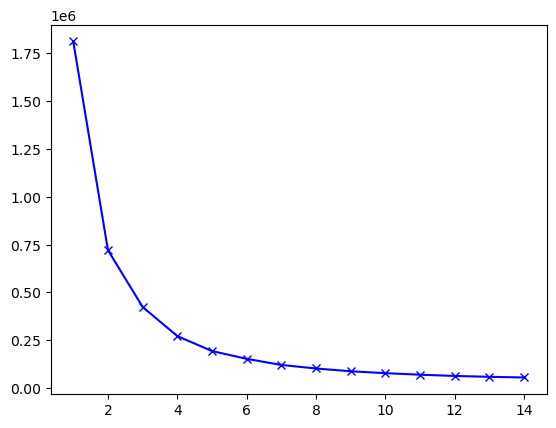

In [63]:
plt.plot(K, sum_distances, 'bx-')
plt.show()

In [64]:
# theo biểu đồ khủy tay trên thì mình thấy k=4 thì có vẻ như tối ưu nhất
k_mean_4=KMeans(n_clusters=4)
model=k_mean_4.fit(movie_np)
label_4=k_mean_4.labels_

In [65]:
label_4

array([1, 3, 1, ..., 0, 0, 1])

In [66]:
metrics.silhouette_score(movie_np,label_4, metric='euclidean')


0.4981176300339368

In [67]:
metrics.calinski_harabasz_score(movie_np,label_4)

10105.231057211256

In [68]:
movies_df.head()

,rating,genre,score,runtime
0,0,2,8.4,146.0
1,0,5,5.8,104.0
2,1,1,8.7,124.0
3,1,0,7.7,88.0
4,0,0,7.3,98.0


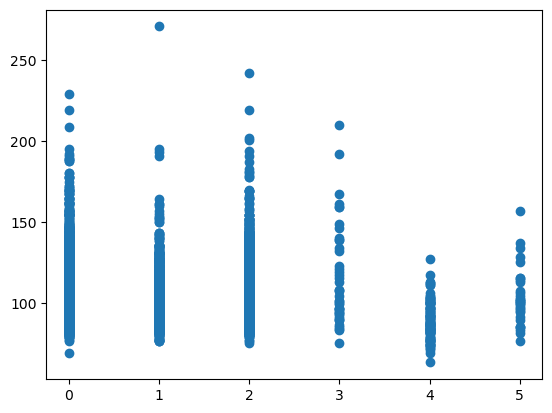

In [69]:
plt.scatter(movie_np[:,0], movie_np[:,3])
plt.show()

IndexError: index 4 is out of bounds for axis 1 with size 4

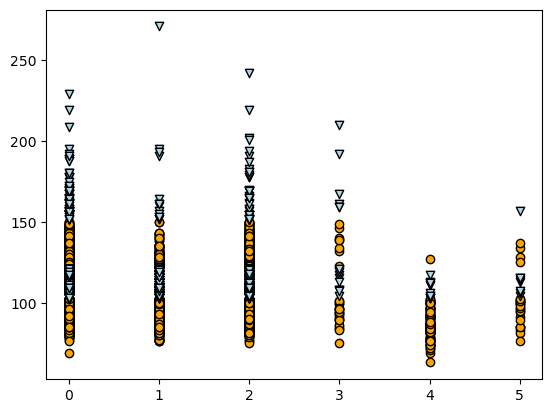

In [73]:

plt.scatter(
    movie_np[label_4 == 0, 0], movie_np[label_4 == 0, 3],
    c='orange',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    movie_np[label_4 == 1, 0], movie_np[label_4 == 1, 3],
    c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    movie_np[label_4 == 2, 0], movie_np[label_4 == 2, 3],
    c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.scatter(
    movie_np[label_4 == 3, 0], movie_np[label_4 == 3, 3],
    c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 4],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [74]:

movies_df1 =df[["id","rating", "genre", "score","runtime"]]

movies_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       5421 non-null   int64  
 1   rating   5421 non-null   object 
 2   genre    5421 non-null   object 
 3   score    5421 non-null   float64
 4   runtime  5421 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 254.1+ KB


In [75]:
movies_df2 = df[["id","name"]]

movies_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5421 non-null   int64 
 1   name    5421 non-null   object
dtypes: int64(1), object(1)
memory usage: 127.1+ KB


In [76]:
movies_df2.head()

,id,name
0,0,The Shining
1,1,The Blue Lagoon
2,2,Star Wars: Episode V - The Empire Strikes Back
3,3,Airplane!
4,4,Caddyshack


In [77]:
lookup=movies_df1.merge(movies_df2, on ='id', how='left')
lookup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 5420
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       5421 non-null   int64  
 1   rating   5421 non-null   object 
 2   genre    5421 non-null   object 
 3   score    5421 non-null   float64
 4   runtime  5421 non-null   float64
 5   name     5421 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 296.5+ KB


In [78]:
label_4=k_mean_4.labels_
label_4

array([1, 3, 1, ..., 0, 0, 1])

In [79]:
lookup.dropna()
lookup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 5420
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       5421 non-null   int64  
 1   rating   5421 non-null   object 
 2   genre    5421 non-null   object 
 3   score    5421 non-null   float64
 4   runtime  5421 non-null   float64
 5   name     5421 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 296.5+ KB


In [80]:
lookup['cluster'] = label_4
lookup.head()

,id,rating,genre,score,runtime,name,cluster
0,0,R,Drama,8.4,146.0,The Shining,1
1,1,R,Adventure,5.8,104.0,The Blue Lagoon,3
2,2,PG,Action,8.7,124.0,Star Wars: Episode V - The Empire Strikes Back,1
3,3,PG,Comedy,7.7,88.0,Airplane!,0
4,4,R,Comedy,7.3,98.0,Caddyshack,0


In [81]:

lookup.head()

,id,rating,genre,score,runtime,name,cluster
0,0,R,Drama,8.4,146.0,The Shining,1
1,1,R,Adventure,5.8,104.0,The Blue Lagoon,3
2,2,PG,Action,8.7,124.0,Star Wars: Episode V - The Empire Strikes Back,1
3,3,PG,Comedy,7.7,88.0,Airplane!,0
4,4,R,Comedy,7.3,98.0,Caddyshack,0


# Function recommendation

In [82]:
def recommend(model, rating, genre, score, runtime):
  arr = np.array([[ rating, genre, score, runtime]])
  pred = model.predict(arr)
  return lookup[lookup['cluster'] == pred[0]].sample(10)

In [83]:
# Quy đổi rating 'R':0,'PG':1,'PG-13':2,'Not Rated':3,'G':4,'Others':5
# Quy đổi genre 'Comedy':0,'Action':1,'Drama':2,'Crime':3,'Biography':4,'Adventure':5,'Animation':5,'Horror':6,'Others':7
rating = 0
genre = 3
score = 7.3
runtime = 100

recommend(model, rating, genre, score, runtime)

,id,rating,genre,score,runtime,name,cluster
2813,4306,PG-13,Biography,6.9,100.0,Girl with a Pearl Earring,0
2649,4120,PG-13,Drama,6.2,99.0,Solaris,0
855,1550,PG,Comedy,4.4,84.0,Police Academy 6: City Under Siege,0
2050,3376,PG-13,Comedy,4.7,100.0,Major League: Back to the Minors,0
3848,5576,PG-13,Comedy,5.8,100.0,Ghosts of Girlfriends Past,0
1544,2678,PG,Comedy,6.1,100.0,Casper,0
4804,6747,R,Comedy,6.6,95.0,Irrational Man,0
947,1716,R,Action,6.0,93.0,Marked for Death,0
298,522,PG-13,Comedy,6.4,95.0,Night of the Comet,0
178,335,R,Adventure,7.4,98.0,National Lampoon's Vacation,0
